## **Question 01**

**Delivery_time -> Predict delivery time using sorting time**

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
# load dataset

from google.colab import files
uploaded = files.upload()

Saving delivery_time.csv to delivery_time.csv


In [3]:
dataset = pd.read_csv('delivery_time.csv')
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
dataset.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
dataset.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [8]:
dataset.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [9]:
dataset.shape

(21, 2)

In [10]:
dataset.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [28]:
import matplotlib.pyplot as plt

In [37]:
# Creating Log Transformed - log

data_log = np.log(dataset)

In [38]:
data_log

,Delivery Time,Sorting Time
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585
5,2.731115,1.791759
6,2.944439,1.945910
7,2.251292,1.098612
8,2.884801,2.302585
9,2.931194,2.197225


Text(0.5, 1.0, 'Log-Transformed Data')

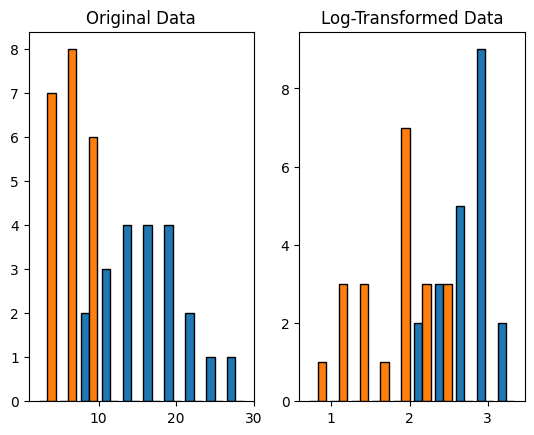

In [39]:
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].hist(dataset, edgecolor='black')
axs[1].hist(data_log, edgecolor='black')
axs[0].set_title('Original Data')
axs[1].set_title('Log-Transformed Data')

In [29]:
# Squareroot Transformation

data_log = np.sqrt(dataset)

In [31]:
data_log

,Delivery Time,Sorting Time
0,4.582576,3.162278
1,3.674235,2.000000
2,4.444097,2.449490
3,4.898979,3.000000
4,5.385165,3.162278
5,3.917908,2.449490
6,4.358899,2.645751
7,3.082207,1.732051
8,4.230839,3.162278
9,4.330127,3.000000


Text(0.5, 1.0, 'Square Root Transformed Data')

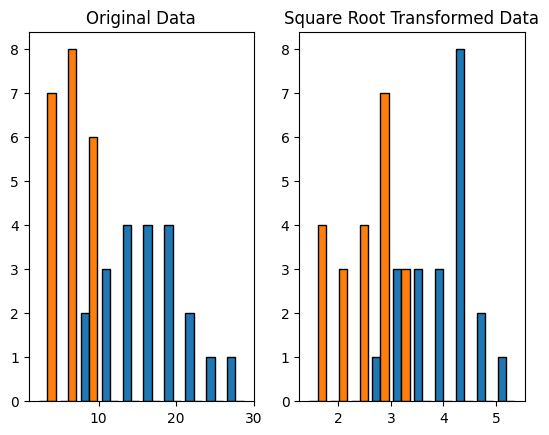

In [32]:
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].hist(dataset, edgecolor='black')
axs[1].hist(data_log, edgecolor='black')
axs[0].set_title('Original Data')
axs[1].set_title('Square Root Transformed Data')

In [33]:
# Cube Root Transformation

data_log = np.cbrt(dataset)

In [34]:
data_log

,Delivery Time,Sorting Time
0,2.758924,2.154435
1,2.381102,1.587401
2,2.703060,1.817121
3,2.884499,2.080084
4,3.072317,2.154435
5,2.485246,1.817121
6,2.668402,1.912931
7,2.117912,1.442250
8,2.615879,2.154435
9,2.656646,2.080084


Text(0.5, 1.0, 'Cube Root Transformed Data')

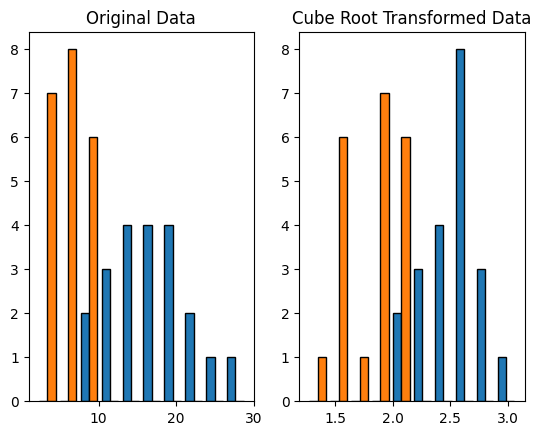

In [35]:
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].hist(dataset, edgecolor='black')
axs[1].hist(data_log, edgecolor='black')
axs[0].set_title('Original Data')
axs[1].set_title('Cube Root Transformed Data')

*  Model Visualization

In [40]:
# Renaming Columns for better understanding as names have whitespaces

dataset=dataset.rename({'Delivery Time':'Delivery_Time', 'Sorting Time':'Sorting_Time'},axis=1)
dataset

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

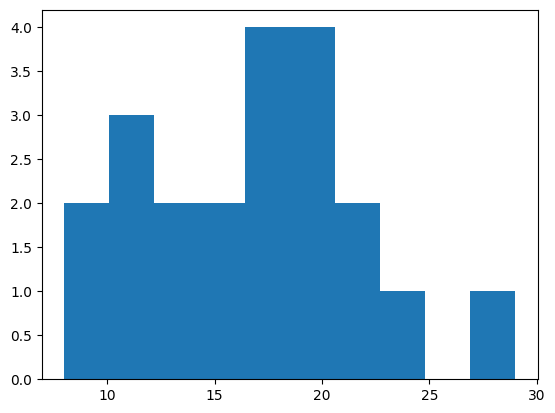

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(dataset['Delivery_Time'])

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

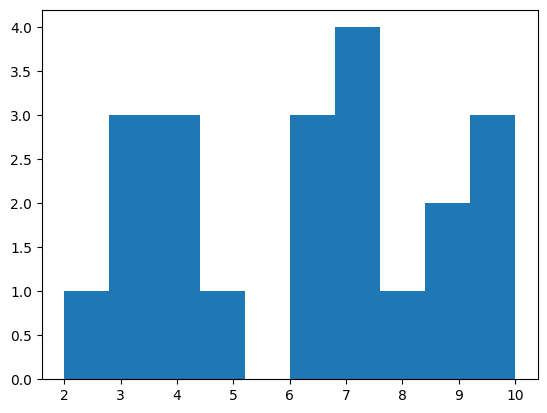

In [42]:
plt.hist(dataset['Sorting_Time'])

<ipython-input-43-f1bdf1ee6d67>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Delivery_Time'])


<Axes: xlabel='Delivery_Time', ylabel='Density'>

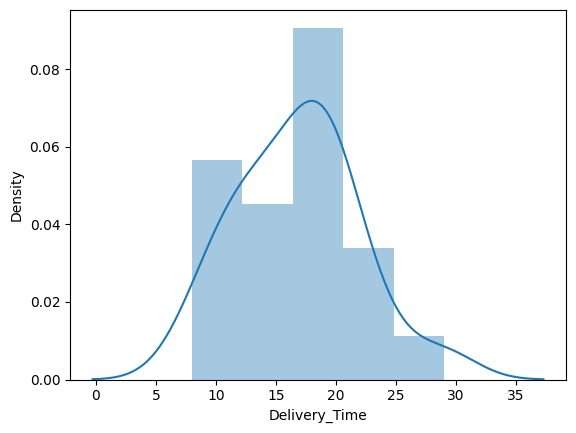

In [43]:
sns.distplot(dataset['Delivery_Time'])

<ipython-input-44-1c97b1f41fcc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Sorting_Time'])


<Axes: xlabel='Sorting_Time', ylabel='Density'>

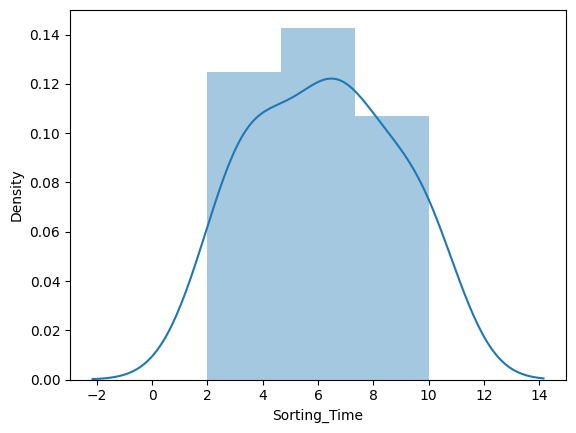

In [44]:
sns.distplot(dataset['Sorting_Time'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6eaae0fc70>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6eaae341f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6eaae0f9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6eaae34730>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6eaae349d0>],
 'means': []}

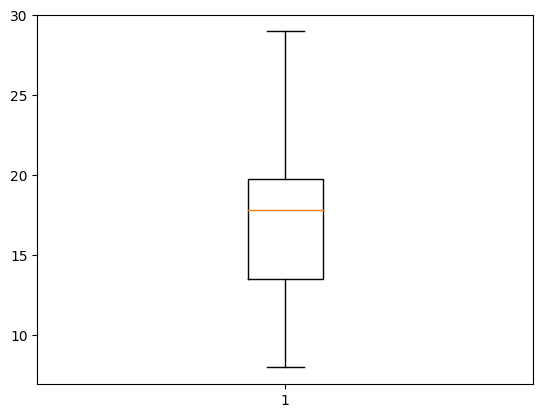

In [45]:
#Outlier Detection

import matplotlib.pyplot as plt
plt.boxplot(dataset['Delivery_Time'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6eaae91180>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6eaae915a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6eaae90ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6eaae91ae0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6eaae91d80>],
 'means': []}

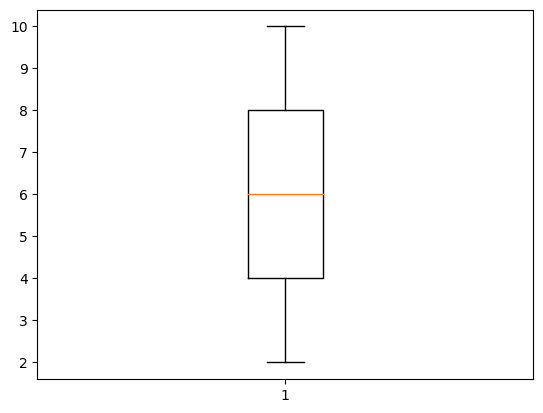

In [46]:
import matplotlib.pyplot as plt
plt.boxplot(dataset['Sorting_Time'])

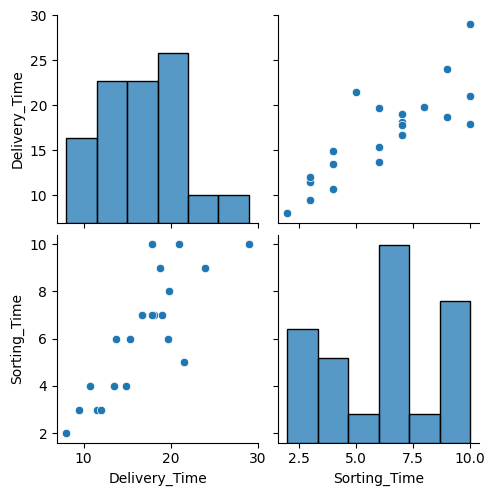

In [47]:
sns.pairplot(dataset)



*  Correlation Analysis



In [48]:
dataset.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


In [52]:
Mean = dataset['Delivery_Time'].mean()
print(Mean)

16.790952380952383


In [54]:
Mean = dataset['Sorting_Time'].mean()
print(Mean)

6.190476190476191


In [55]:
# Normalization

from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [56]:
dataset.values

array([[21.  , 10.  ],
       [13.5 ,  4.  ],
       [19.75,  6.  ],
       [24.  ,  9.  ],
       [29.  , 10.  ],
       [15.35,  6.  ],
       [19.  ,  7.  ],
       [ 9.5 ,  3.  ],
       [17.9 , 10.  ],
       [18.75,  9.  ],
       [19.83,  8.  ],
       [10.75,  4.  ],
       [16.68,  7.  ],
       [11.5 ,  3.  ],
       [12.03,  3.  ],
       [14.88,  4.  ],
       [13.75,  6.  ],
       [18.11,  7.  ],
       [ 8.  ,  2.  ],
       [17.83,  7.  ],
       [21.5 ,  5.  ]])

In [57]:
array = dataset.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array[:,0:5])

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[0.62 1.  ]
 [0.26 0.25]
 [0.56 0.5 ]
 [0.76 0.88]
 [1.   1.  ]]


In [58]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

In [59]:
array = dataset.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[ 0.85  1.54]
 [-0.66 -0.88]
 [ 0.6  -0.08]
 [ 1.46  1.13]
 [ 2.47  1.54]]


*  Model Building

In [60]:
model = smf.ols("Delivery_Time~Sorting_Time", data=dataset).fit()
model

In [61]:
# Coefficient parameters

model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [62]:
# Finding tvalues and pvalues

print(model.tvalues, '\n',model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [63]:
#r squared value

model.rsquared

0.6822714748417231

<Axes: xlabel='Sorting_Time', ylabel='Delivery_Time'>

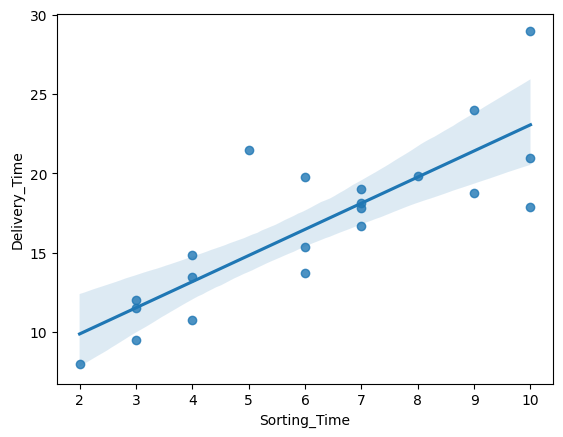

In [64]:
sns.regplot(x=dataset['Sorting_Time'],y=dataset['Delivery_Time'])

In [65]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           3.98e-06
Time:                        06:39:51   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*  **Model Predictions**


In [66]:
# Manual prediction

delivery_time = (6.582734) + (1.649020)*(8)
delivery_time

19.774894

In [67]:
# Automatic Prediction

new_data=pd.Series([8,10])
new_data

0     8
1    10
dtype: int64

In [68]:
data_pred=pd.DataFrame(new_data,columns=['Sorting_Time'])
data_pred

,Sorting_Time
0,8
1,10


In [69]:
model.predict(data_pred)

0    19.774893
1    23.072933
dtype: float64

In [72]:
data_log = np.log(delivery_time)

In [73]:
data_log

2.9844131533359377

In [82]:
data_sqrt = np.sqrt(delivery_time)

In [83]:
data_sqrt

4.44689712046501

In [84]:
data_cbrt = np.cbrt(delivery_time)

In [85]:
data_cbrt

2.7041953068725224

### **Question 2**

**2) Salary_hike -> Build a prediction model for Salary_hike**

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [86]:
from google.colab import files
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [87]:
dataset = pd.read_csv('Salary_Data.csv')
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [88]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [89]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [90]:
dataset.shape

(30, 2)

In [91]:
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<ipython-input-92-c16c18e1f77c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

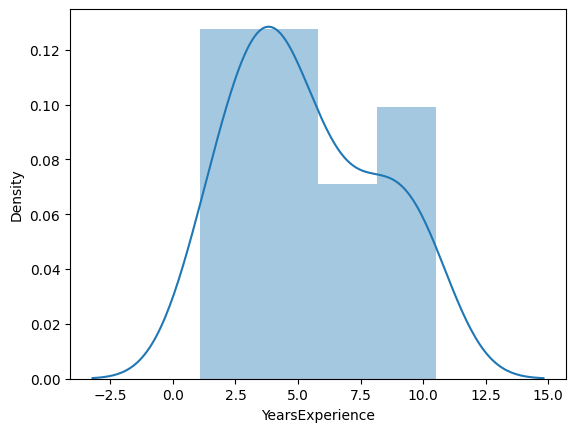

In [92]:
sns.distplot(dataset['YearsExperience'])

<ipython-input-93-9fd6134c9331>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

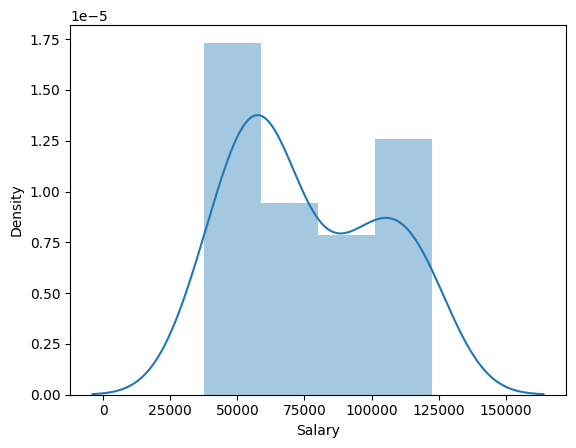

In [93]:
sns.distplot(dataset['Salary'])

<ipython-input-94-13cc1376fcd9>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


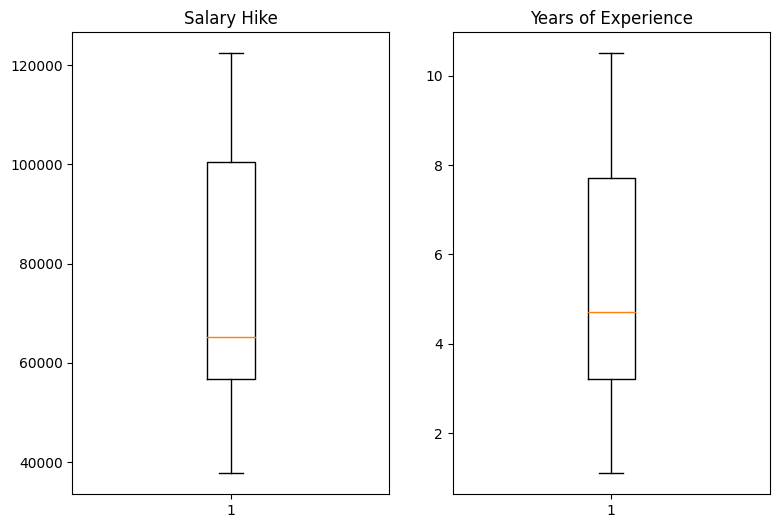

In [94]:
# for checking outliers
# we can plot boxplot in different ways, one was shown above and this is another method to plot boxplot in a single frame
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(dataset['Salary'])
plt.title('Salary Hike')
plt.subplot(122)
plt.boxplot(dataset['YearsExperience'])
plt.title('Years of Experience')
plt.show()

*  Correlation Analysis

In [95]:
dataset.corr

<bound method DataFrame.corr of     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0>

*  Model Building

In [96]:
model=smf.ols("Salary~YearsExperience",data=dataset).fit()
model

<Axes: xlabel='YearsExperience', ylabel='Salary'>

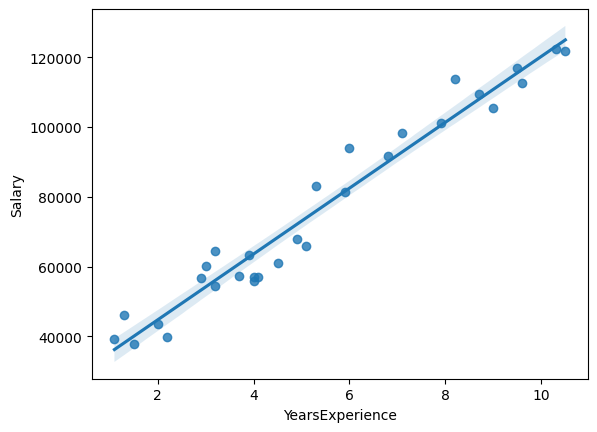

In [97]:
sns.regplot(x=dataset['YearsExperience'],y=dataset['Salary'])

In [98]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           1.14e-20
Time:                        07:03:59   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [100]:
# Finding Pvalues and tvalues

model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [101]:
# Finding Rsquared values

model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

*  Model Predictions

In [109]:
# Manual prediction for say 3 Years Experience

Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [110]:
# Automatic Predictions

# first model results without any transformation
Auto_predicted = pd.DataFrame()
Auto_predicted['YearsExperience'] = dataset.YearsExperience
Auto_predicted['Salary'] = dataset.Salary
Auto_predicted['Predicted_Salary_Hike'] = pd.DataFrame(model.predict(Auto_predicted.YearsExperience))
Auto_predicted

,YearsExperience,Salary,Predicted_Salary_Hike
0,1.1,39343.0,10.645400
1,1.3,46205.0,10.670491
2,1.5,37731.0,10.695581
3,2.0,43525.0,10.758308
4,2.2,39891.0,10.783398
5,2.9,56642.0,10.871215
6,3.0,60150.0,10.883761
7,3.2,54445.0,10.908851
8,3.2,64445.0,10.908851
9,3.7,57189.0,10.971578


In [111]:
data_log = np.log(Auto_predicted)

In [112]:
data_log

,YearsExperience,Salary,Predicted_Salary_Hike
0,0.095310,10.580073,2.365128
1,0.262364,10.740843,2.367482
2,0.405465,10.538237,2.369831
3,0.693147,10.681091,2.375678
4,0.788457,10.593906,2.378008
5,1.064711,10.944506,2.386118
6,1.098612,11.004597,2.387272
7,1.163151,10.904946,2.389574
8,1.163151,11.073567,2.389574
9,1.308333,10.954117,2.395308


Text(0.5, 1.0, 'Log-Transformed Data')

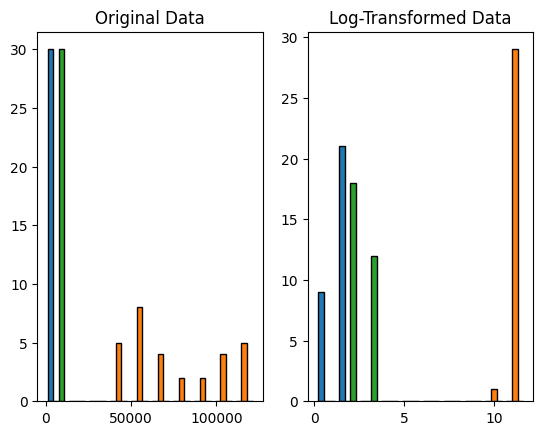

In [113]:
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(Auto_predicted, edgecolor='black')
axs[1].hist(data_log, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Log-Transformed Data')

In [115]:
data_sqrt = np.sqrt(Auto_predicted)

In [116]:
data_sqrt

,YearsExperience,Salary,Predicted_Salary_Hike
0,1.048809,198.350700,3.262729
1,1.140175,214.953483,3.266572
2,1.224745,194.244691,3.270410
3,1.414214,208.626460,3.279986
4,1.483240,199.727314,3.283808
5,1.702939,237.995798,3.297153
6,1.732051,245.254969,3.299054
7,1.788854,233.334524,3.302855
8,1.788854,253.860198,3.302855
9,1.923538,239.142217,3.312337


Text(0.5, 1.0, 'Square Root Transformed Data')

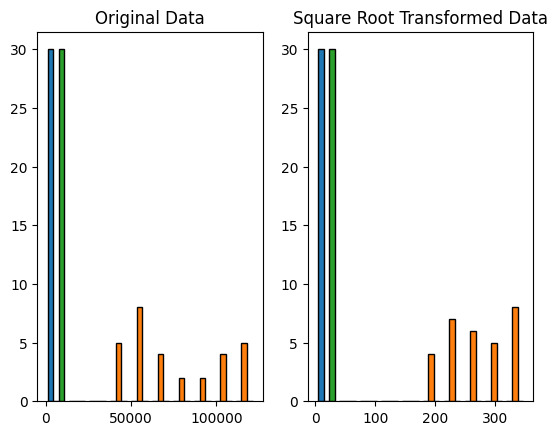

In [117]:
fig, axs = plt.subplots(nrows=1, ncols=2)

#create histograms
axs[0].hist(Auto_predicted, edgecolor='black')
axs[1].hist(data_sqrt, edgecolor='black')

#add title to each histogram
axs[0].set_title('Original Data')
axs[1].set_title('Square Root Transformed Data')

In [118]:
data_cbrt = np.cbrt(Auto_predicted)

(array([[30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  3., 11.,  5., 11.],
        [30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([ 1.03,  5.89, 10.76, 15.62, 20.48, 25.34, 30.2 , 35.06, 39.93,
        44.79, 49.65]),
 <a list of 3 BarContainer objects>)

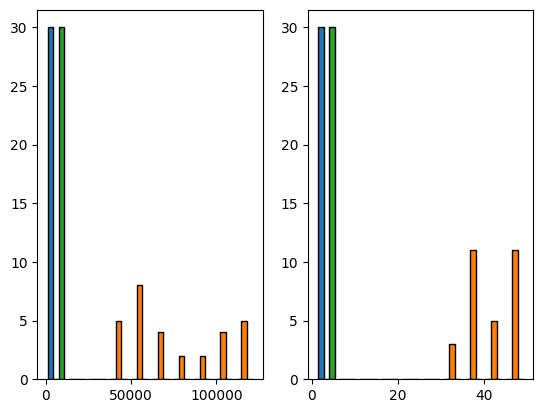

In [119]:
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].hist(Auto_predicted, edgecolor='black')
axs[1].hist(data_cbrt, edgecolor='black')

In [120]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [121]:
Auto_predicted.values

array([[1.10e+00, 3.93e+04, 1.06e+01],
       [1.30e+00, 4.62e+04, 1.07e+01],
       [1.50e+00, 3.77e+04, 1.07e+01],
       [2.00e+00, 4.35e+04, 1.08e+01],
       [2.20e+00, 3.99e+04, 1.08e+01],
       [2.90e+00, 5.66e+04, 1.09e+01],
       [3.00e+00, 6.02e+04, 1.09e+01],
       [3.20e+00, 5.44e+04, 1.09e+01],
       [3.20e+00, 6.44e+04, 1.09e+01],
       [3.70e+00, 5.72e+04, 1.10e+01],
       [3.90e+00, 6.32e+04, 1.10e+01],
       [4.00e+00, 5.58e+04, 1.10e+01],
       [4.00e+00, 5.70e+04, 1.10e+01],
       [4.10e+00, 5.71e+04, 1.10e+01],
       [4.50e+00, 6.11e+04, 1.11e+01],
       [4.90e+00, 6.79e+04, 1.11e+01],
       [5.10e+00, 6.60e+04, 1.11e+01],
       [5.30e+00, 8.31e+04, 1.12e+01],
       [5.90e+00, 8.14e+04, 1.12e+01],
       [6.00e+00, 9.39e+04, 1.13e+01],
       [6.80e+00, 9.17e+04, 1.14e+01],
       [7.10e+00, 9.83e+04, 1.14e+01],
       [7.90e+00, 1.01e+05, 1.15e+01],
       [8.20e+00, 1.14e+05, 1.15e+01],
       [8.70e+00, 1.09e+05, 1.16e+01],
       [9.00e+00, 1.06e+0

In [122]:
array = Auto_predicted.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array[:,0:5])

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])


[[0.   0.02 0.  ]
 [0.02 0.1  0.02]
 [0.04 0.   0.04]
 [0.1  0.07 0.1 ]
 [0.12 0.03 0.12]]


In [123]:
from sklearn.preprocessing import StandardScaler

In [124]:
array = Auto_predicted.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[-1.51 -1.36 -1.51]
 [-1.44 -1.11 -1.44]
 [-1.37 -1.42 -1.37]
 [-1.19 -1.2  -1.19]
 [-1.12 -1.34 -1.12]]


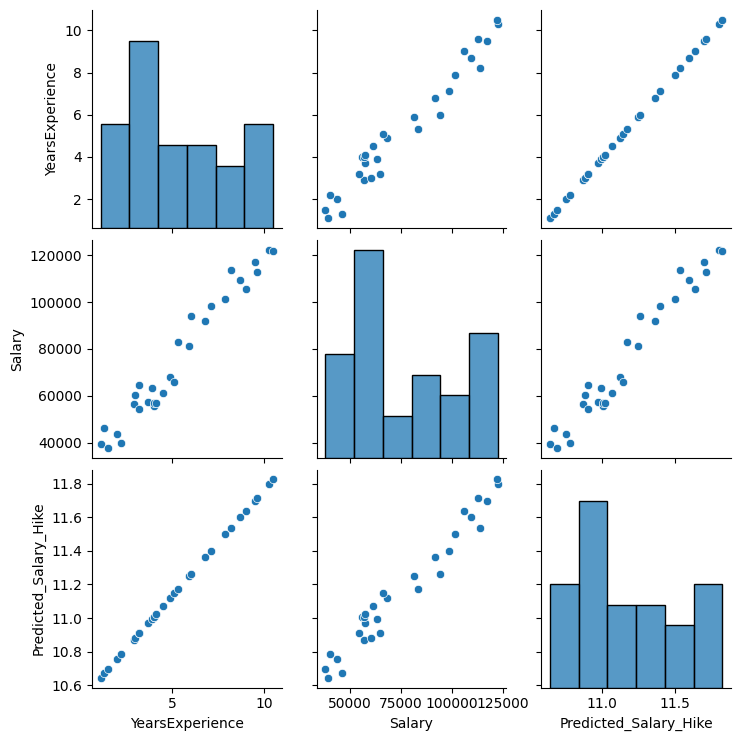

In [125]:
import seaborn as sns
sns.pairplot(Auto_predicted)